In this tutorial, we are going to see how type II errors are affected by the effect size and sample size. 

As we saw in the lectures, null hypothesis testing is mainly based on Type I errors, $\alpha$, which is the error that you would commit if you reject the null being true. You want to have this error small so that you are as little wrong as possible when rejecting the null when this is in fact true. For example, you don't want to end up giving people a drug that does not have a real effect at all.

However, type II errors, $\beta$,  are also important. Type II errors are related to not being able to reject the null when the alternative is true. As a result, you also want to have these errors small to a certain degree, so that you have some certainty that you will be able to detect the expected significant effect. For example, there's a drug that has a real effect on people's health, but you missed it because of a large type II error. When talking about type II errors, instead of $\beta$, people prefer to do it in terms of 1-$\beta$, which is known as **statistical power**. Having a high statistical power is something usually sought and that we can achieve when designing a experiment by basically playing with the sample size (effect sizes are out of our control).

For this tutorial, let's suppose that we are dealing with a population that follows a gaussian distribution with a known standard deviation of sd=1.

In [1]:
sd<-1

Also, for this tutorial we are going to assess errors using a one-sample t-test. Don't worry about the meaning of this test right now; we will see it in next week's lecture. For now, you just need to know that this test allows you to quantify how likely your data are with respect to an assumed population mean. In R this can be known with the built-in function `t.test`. Let's see the arguments and documentation of this function:

In [2]:
args(t.test)

function (x, ...) 
NULL

In [3]:
?t.test

As you can, you may pass to this function a sample X and optionaly the assumed population mean (by default this is taken to 0), and it will give you, among other things, a p-value, which quantifies how likely the data are under the assumed population mean.

In [4]:
N<-50
mu<-0.1
set.seed(123)
sample<-rnorm(N, mean = mu, sd = sd)

cat("mean =", mu, ",", "sample size =", N, ",", "p-value =", t.test(sample)$p.value, "\n")
mu<-0.4
set.seed(123)
sample<-rnorm(N, mean = mu, sd = sd)

cat("mean =", mu, ",", "sample size =", N, ",", "p-value =", t.test(sample)$p.value)

mean = 0.1 , sample size = 50 , p-value = 0.3097114 
mean = 0.4 , sample size = 50 , p-value = 0.001716822

As you can see, the p-value has decreased when the mean increased. This is because it gets further from zero, which was the assumed population mean.

In [5]:
mu<-0.1
N<-50
set.seed(123)
sample<-rnorm(N, mean = mu, sd = sd)

cat("mean =", mu, ",", "sample size =", N, ",", "sample size =", t.test(sample)$p.value, "\n")
N<-500
set.seed(123)
sample<-rnorm(N, mean = mu, sd = sd)

cat("mean =", mu, ",", "sample size =", N, ",", "sample size =", t.test(sample)$p.value)

mean = 0.1 , sample size = 50 , sample size = 0.3097114 
mean = 0.1 , sample size = 500 , sample size = 0.002087055

Here, however, the p-value has decreased when the sample size increased. This is because the estimation of the mean got more precise (You remember the central limit theorem and how errors decrease when sample sizes increase, right?)

Ok, so let's do a bit different now. Let's consider different populations of 1000 subjects, for example, where we know there is a real effect (i.e. a mean different from 0) because we define our populations in that way.

In [6]:
set.seed(123) # Set the seed to have the same results always.
sd<-1 # All our populations will have this known standard deviation
mus<-c(0.05, 0.1, 0.2, 0.3, 0.5, 0.8) # Set of population meams
sizes<-c(10, 20, 50, 100, 150, 200, 300, 500, 750, 1000) # Set of sample sizes
n.exp<-100 # Number of experiments, i.e. number of times we sample from our specific populations 

powers.df<-data.frame(power=c(), mu=c(), size=c())
for (mu in mus){
    pop<-rnorm(1000, mean = mu, sd = sd) # A population with a specif mean different from 0 and sd = 1
    
    power<-c()
    for (size in sizes){
        # list of p-values applying a one-sample t-test of each sample with respect to a null population = 0.
        list.pvs <-c()
        for (ii in (1:n.exp)){
            one.sample<-sample(pop, size = size) # one sample from the previous population
            
            list.pvs<- c(list.pvs, t.test(one.sample)$p.value)
        
        }
        # This is the % times we are able to reject the null. Since we know there is a real effect,
        # it would correspond to calculating the statistical power.
        power<-c(power, sum(list.pvs<0.05))
    
    }
   df<-data.frame(power=power, size=sizes)
   df$mu<-mu
                          
    powers.df<-rbind(powers.df, df)
                          
}
powers.df$mu<-as.factor(powers.df$mu)

Let's plot  all this together!!

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


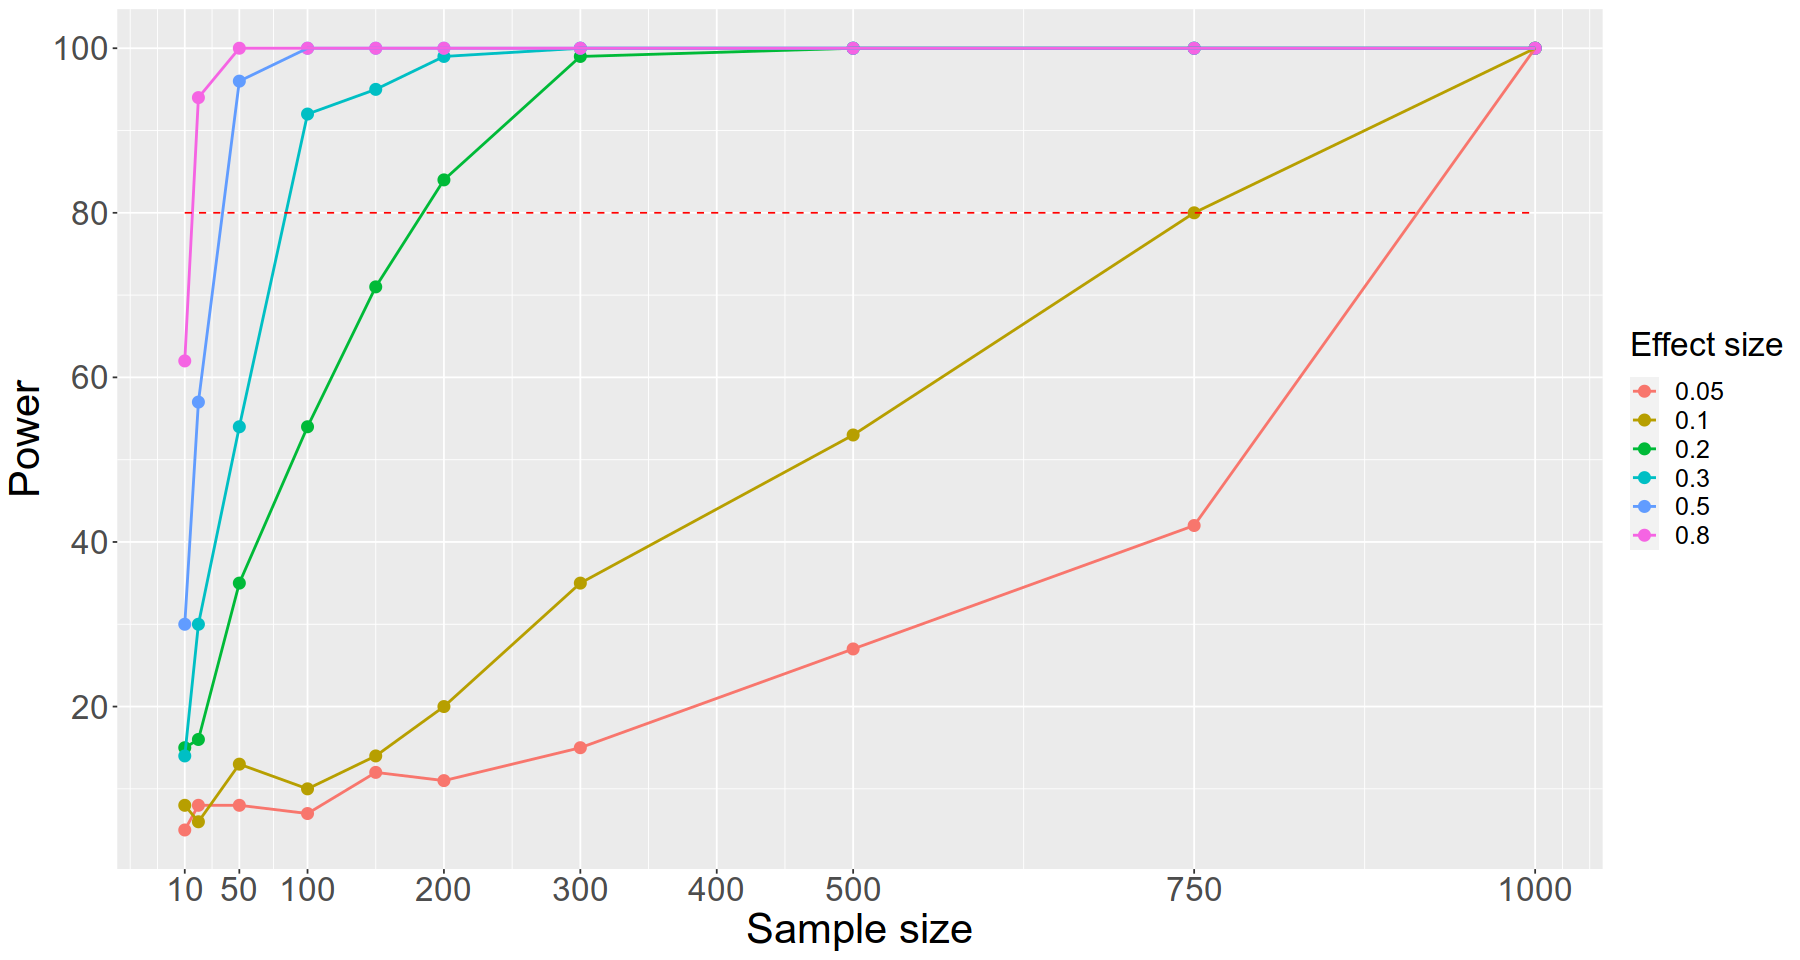

In [7]:
library(tidyverse)

options(repr.plot.width=15, repr.plot.height=8) # this is just to change the aspect ratio of my graph

ggplot(data=powers.df, mapping = aes(x=size, y=power, color=mu)) + 
geom_point(size=3) + 
geom_line(linewidth=0.8) + 
geom_line(y=80, color="red", linetype=2) + 
scale_y_continuous("Power", breaks=c(20, 40, 60, 80, 100)) + # Here I am redefining the y-axis ticks and label
scale_x_continuous("Sample size", breaks=c(10, 50, 100, 200, 300, 400, 500, 750, 1000)) + # Here I am redefining the x-axis ticks and label
scale_color_discrete("Effect size") + 
theme(axis.text = element_text(size = 20), # This controls certain aspects of the theme. 
      axis.title = element_text(size=25), 
      legend.title = element_text(size=20),
      legend.text = element_text(size=15))    

Here above I am also depicting a red line which marks a 80% threshold for the statistical power. This is a standard lower limit that is usually enforced when designing a study, so that you are sure that at least 80% of the times you'll be able to detect the expected effect.

As you can see, when effect and sample sizes increase, so does statistical power. 

This means, for example, that you may always be able to detect an effect with a sufficiently large sample size. However, it comes with a caveat, because it may happen that you claim a significant result, only because your study is big and not because there is a real effect. This is a common cited example, extracted from the paper ["Using Effect Size—or Why the P Value Is Not Enough"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174):

*Some years ago, in a Physicians Health Study of aspirin to prevent myocardial infarction (MI) and using more than 22 000 subjects over an average of 5 years, it was found that aspirin was associated with a reduction in MI (although not in overall cardiovascular mortality) that was highly statistically significant: P < .00001. The study was terminated early due to the conclusive evidence, and aspirin was recommended for general prevention. However, the effect size was very small: a risk difference of 0.77%. As a result of that study, many people were advised to take aspirin who would not experience benefit yet were also at risk for adverse effects. Further studies found even smaller effects, and the recommendation to use aspirin has since been modified.*

Finally, throughout this tutorial we have been considering the mean as the measure of effect size. This is true for our particular scenario, since the standard deviation was equal to 1. However, on some other occasions, you will have to take into account the standard deviation when estimating the effect size. In addition, here we were using a t-test, but other statistical tests have their own measures of effect size. We will come to all of this in the future...